# Classification
An area of supervised machine learning that tries to predict which class or category some entity belongs to based on its features

## Logistic Regression
Useful for:
* classifying samples (obese vs not obese)
* using different types of data to classify these samples
* assessing which variables are useful for classifying samples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#four variables: certified, forum.posts, grade, and assignment

In [2]:
mooc = pd.read_csv("ICE4_Data.csv")
mooc

,certified,forum.posts,grade,assignment
0,no,7,3,9
1,no,7,4,1
2,yes,191,8,19
3,yes,130,10,18
4,yes,135,8,18
...,...,...,...,...
995,yes,88,10,13
996,yes,153,10,19
997,no,41,4,3
998,no,47,6,12


In [3]:
#pull up descriptive data to better understand the data
mooc['certified'].value_counts()
#summary of values within the certified column

yes    725
no     275
Name: certified, dtype: int64

In [4]:
mooc.describe()

,forum.posts,grade,assignment
count,1000.000000,1000.00000,1000.000000
mean,113.107000,7.76500,13.693000
std,55.126477,2.38232,5.011973
min,1.000000,1.00000,1.000000
25%,72.750000,8.00000,12.000000
50%,118.500000,8.00000,15.000000
75%,160.000000,9.00000,17.000000
max,200.000000,10.00000,20.000000


array([[<AxesSubplot:xlabel='forum.posts', ylabel='forum.posts'>,
        <AxesSubplot:xlabel='grade', ylabel='forum.posts'>,
        <AxesSubplot:xlabel='assignment', ylabel='forum.posts'>],
       [<AxesSubplot:xlabel='forum.posts', ylabel='grade'>,
        <AxesSubplot:xlabel='grade', ylabel='grade'>,
        <AxesSubplot:xlabel='assignment', ylabel='grade'>],
       [<AxesSubplot:xlabel='forum.posts', ylabel='assignment'>,
        <AxesSubplot:xlabel='grade', ylabel='assignment'>,
        <AxesSubplot:xlabel='assignment', ylabel='assignment'>]],
      dtype=object)

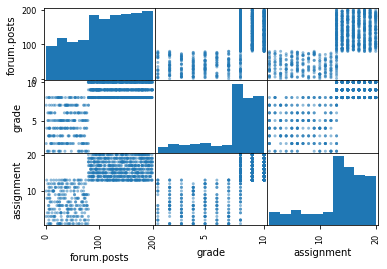

In [5]:
pd.plotting.scatter_matrix(mooc)
#one way of graphing the dataset but it's uglier and harder to interpret

In [6]:
#another way to graph the data. pairplot() function has the option to color-code points based on values in one column
import seaborn as sns

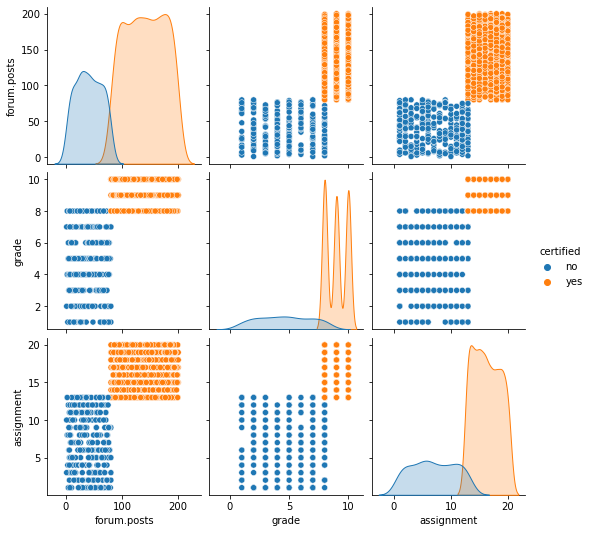

In [7]:
sns.pairplot(mooc, hue = "certified")

In [8]:
# Pause for comment on descriptives #
# This graphic shows us the relationships between two columns at a time and their effects on whether students were able to achieve certification. There is a clear difference between completing more assignments/forum posts/receiving a higher grade and success of certification

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
dummy = pd.get_dummies(mooc['certified'], prefix = 'certified')
#prefix will create new column names
dummy

,certified_no,certified_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,0,1
996,0,1
997,1,0
998,1,0


In [11]:
#since we only need one column, we'll merge this new df with 'mooc' and drop the 'no' column
moocD = pd.concat([mooc, dummy], axis=1)
moocD = moocD.drop(['certified', 'certified_no'], axis=1)
moocD

,forum.posts,grade,assignment,certified_yes
0,7,3,9,0
1,7,4,1,0
2,191,8,19,1
3,130,10,18,1
4,135,8,18,1
...,...,...,...,...
995,88,10,13,1
996,153,10,19,1
997,41,4,3,0
998,47,6,12,0


In [12]:
#one-hot encoding method, works quicker to produce same results
mooc_dummies = pd.get_dummies(mooc, prefix='certified_recode', columns=['certified'])
mooc_dummies

,forum.posts,grade,assignment,certified_recode_no,certified_recode_yes
0,7,3,9,1,0
1,7,4,1,1,0
2,191,8,19,0,1
3,130,10,18,0,1
4,135,8,18,0,1
...,...,...,...,...,...
995,88,10,13,0,1
996,153,10,19,0,1
997,41,4,3,1,0
998,47,6,12,1,0


In [13]:
mooc_dummies = mooc_dummies.drop('certified_recode_no', axis=1)
mooc_dummies

,forum.posts,grade,assignment,certified_recode_yes
0,7,3,9,0
1,7,4,1,0
2,191,8,19,1
3,130,10,18,1
4,135,8,18,1
...,...,...,...,...
995,88,10,13,1
996,153,10,19,1
997,41,4,3,0
998,47,6,12,0


The logistic regression model is: 
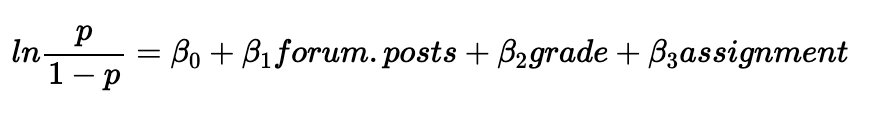
where p is the probability of earning the certificate

to fill in this formula...

In [14]:
#create an array of Xs and an array for the training labels - certified_yes
Xs = moocD[["forum.posts", "grade", "assignment"]].to_numpy()
certified = moocD.loc[:,"certified_yes"].values.reshape(-1, 1)

In [15]:
#load LogisticRegression() and call for LogisticRegression.fit() - similar to what we've done in preivous ICE's
moocLogitModel1 = LogisticRegression()
moocLogitModel1.fit(Xs, certified)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [16]:
#call for the intercept and coefficients of each parameter to create our logistic regression model
moocLogitModel1.intercept_

array([-63.13291439])

In [17]:
moocLogitModel1.coef_

array([[0.62419697, 0.52270711, 0.85766257]])

In [18]:
#use statsmodel.api for a nicer visual output
## NOTE it's different from the sklearn model, which was done before this line
import statsmodels.api as sm

moocLogitModel2 = sm.Logit(certified, Xs)
moocLogitModel2Fit = moocLogitModel2.fit()
print(moocLogitModel2Fit.summary())

Optimization terminated successfully.
         Current function value: 22.457768
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                     inf
Time:                        08:24:50   Log-Likelihood:                -22458.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0378      0.003     10.852      0.000       0.031       0.045
x2            -0.3202      0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


### differences between <mark>sklearn</mark> and <mark>statsmodels</mark>
* statsmodels doesn't estimate the intercept, so all coef's are shifted
* regularization parameter

#### Do the different results matter?
Yes if the goal is to evaluate the impact of each predictor on the predicted variable
* The implementation in both models deviates from the standard method of logistic regression. 
* Necessary to investigate the differences if interpreting results for stats
No if simply building a classifier
* Both models are able to predict the <mark>certified_yes</mark> with given features without problems.

From https://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels, explaining the difference between sklearn and statsmodels:
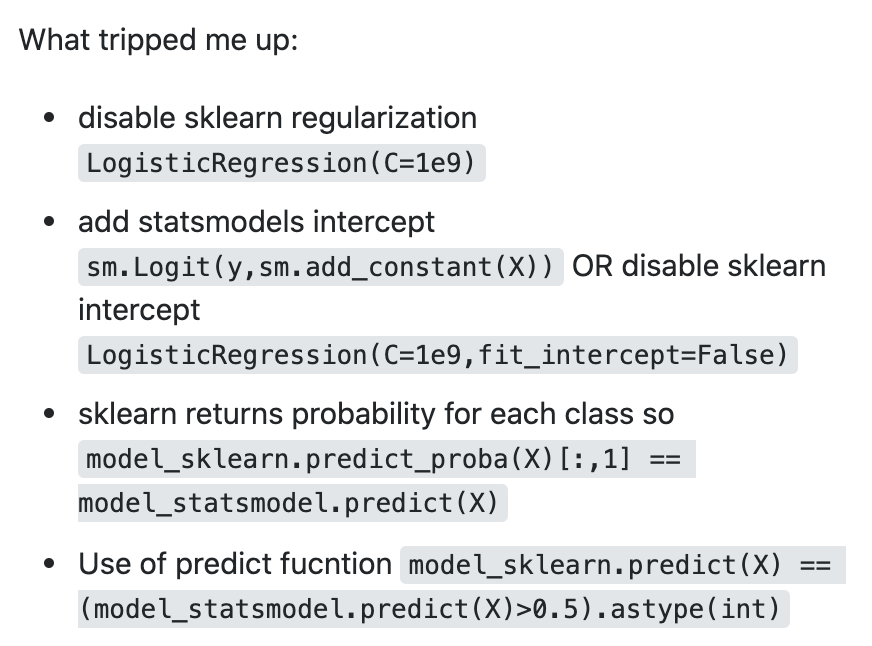

## Decision Tree
The branches on a decision tree depend on a number of factors. It splits data into branches until it achieves a threshold value. 
Decision trees consist of the root nodes, childfren nodes, and leaf nodes.

A simplistic form of understanding decision trees would be to think of them as flow charts.

Decision trees learn from data to approximate teh training data with a set of if-then-else decision rules. Deeper trees have more complex decision rules and fitter model.

In [19]:
# First import the Decision Tree Classifier from sklearn.tree to prepare the data
from sklearn.tree import DecisionTreeClassifier

Xs_tree = mooc.drop('certified', axis=1)
certified = mooc['certified']

In [20]:
#similarly, initialize the classification tree model and use the Xs and Y to train the model
moocTreeModel = DecisionTreeClassifier()
moocTreeModel.fit(Xs_tree, certified)

DecisionTreeClassifier()

#### Now that we have the model prepped, we can represent the analyses in different ways. 

In [22]:
# Text Representation: useful for working on applications without user interface or logging information about the model into the text file
from sklearn import tree
text_representation = tree.export_text(moocTreeModel)
print(text_representation)

|--- feature_0 <= 79.50
|   |--- class: no
|--- feature_0 >  79.50
|   |--- feature_1 <= 7.50
|   |   |--- class: no
|   |--- feature_1 >  7.50
|   |   |--- class: yes



[Text(133.92000000000002, 181.2, 'forum.posts <= 79.5\ngini = 0.399\nsamples = 1000\nvalue = [275, 725]\nclass = no'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 271\nvalue = [271, 0]\nclass = no'),
 Text(200.88000000000002, 108.72, 'grade <= 7.5\ngini = 0.011\nsamples = 729\nvalue = [4, 725]\nclass = no'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = no'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 725\nvalue = [0, 725]\nclass = no')]

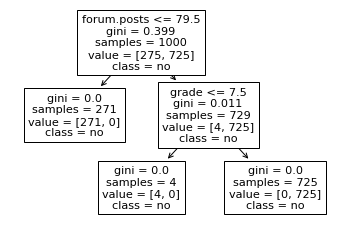

In [23]:
# Plot Tree: prettier method that requires matplotlib
tree.plot_tree(moocTreeModel,
              feature_names = ["forum.posts", "grade", "assignment"],
                  class_names = mooc.certified
              )
 # specifying the feature and class names is optional - it just lets the plot know

## Naive Bayes
This group of models are extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Their speed and limited parameters makes them a useful baseline for a classification problem.

Naive Bayes classifiers are built on Bayesian classification methods. They rely on Bayes's theorem, an equation describing the relationship of conditional probabilities of statistical quantities. **In Bayesian classification, we're interested in finding the *probability of a label given some observed features*, which we can write as *P(L}features)*.** From Bayes's theorum, a way to express this in terms of quantities we can compute more directly:
        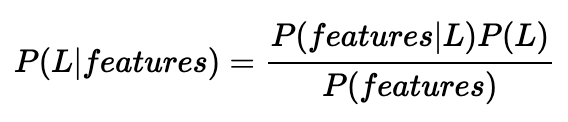
To decide between 2 labels (L1 and L2), we can make this decision by computing the ratio of hte posterior probabilities for each label:
        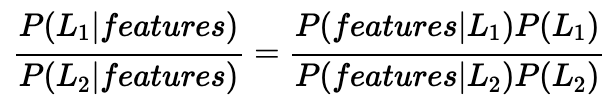
Now we need a generative model to compute *P(features|L<sub>i</sub>)* for each label. This specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of training for a Bayesian classifier. We can simplify the training step by using some simplifying assumptions about the form of this model.

<mark>This is where "naive" comes in for "naive Bayes"</mark>: if we make naive assumptions about the generative model for each label, we can finda  rough approximation of the generative model for each class, then proceed with the Bayesian classification.

FMI [YT statQuest](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
    [YT Luis Serrano](https://youtu.be/Q8l0Vip5YUw)

In [26]:
# import the GaussianNB from sklearnand create Xs and Y
from sklearn.naive_bayes import GaussianNB

Xs_NB = mooc.drop('certified', axis=1)
certified = mooc['certified']

In [27]:
# initialize the classification Naive Bayes model and then the sam etwo lines of code

moocNBModel = GaussianNB()
moocNBModel.fit(Xs_NB, certified)

GaussianNB()

We can measure our model performance by obtaining a predicted y variable <mark>certified_pred</mark> and compare that with the <mark>certified</mark>. Here we use <mark>predict()</mark> to use given Xs to predict the given Y. 
Then use an advanced way in Python called list comprehension to obtain whether each element in <mark>certified_pred</mark> matches the elements in <mark>certified</mark>. The result returns a list of True (1) or False (0); then we sum them and divide by the length of the list to obtain the accuracy.

In [30]:
certified_pred = moocNBModel.predict(Xs_NB)
performance = [item in certified_pred for item in certified]
print('The accuracy is', sum(performance)/len(performance)*100, '%')

The accuracy is 100.0 %


How is our accuracy 100%?
* As seen in the descriptives, our data is very pretty. Real data won't come out as cleanly.
* We're using the Xs thatwe used to train the model to obtain the predicted value. In other words, the model has already seen them.

## Model Evaluation
We need a sample of data held back from training your model that is used to give an estimate of model performance.

In machine learning, this data is often called either <mark>*validation data* or *test data*</mark> as opposed to the <mark>*training data*</mark>, which was used to train the model.

>At an introductory level (this class), the model is simple so there's no need to differentiate between validation & test data. We can use them interchangeably for now but note that they are different.

### Confusion matrix
A simplistic way of measuring model performance.

This is a performance measurement for machine learning classification problems where output can be two or more classes. It's a table with 4 different combinations of predicted and actual values.
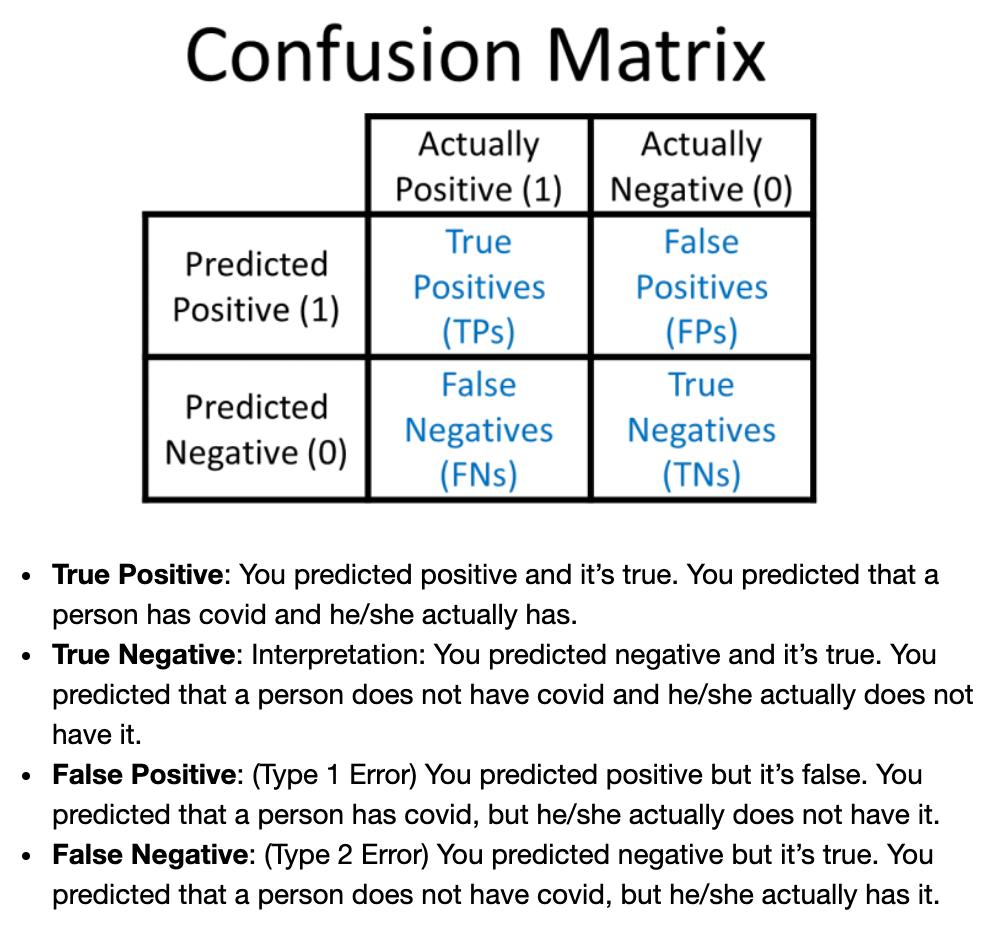

Finding these 4 numbers makes things pretty easy. The simplistic measure would be *accuracy* as measured by *(TP+TN)/total*. This tells us how often the classifier is correct. 

#### Here's what we need to do:
1. Split the data into two sets (by convention it is 80:20, but it can be another ratio - either larger or smaller depending on how many data points you have).
2. Re-train the models
3. Feed the Xs in the testing dataset and obtain the predicted Ys.
4. Compare the predicted Ys with what is actually in the testing dataset (the ground truth) and obtain the confusion matrix.
5. Obtain the accuracy from teh confusion matrix.


**Step 1.** Split data (do things a little bit differently for logistic regression model and the decision tree/Naive Bayes model bc the latter two can handle categorical data without requiring dummy coding).

In [31]:
from sklearn.model_selection import train_test_split

## For logistic regression
Xs_logit = moocD[["forum.posts", "grade", "assignment"]].to_numpy()
certified_logit = moocD.loc[:,"certified_yes"].values.reshape(-1, 1)
xs_logit_training, xs_logit_test, y_logit_training, y_logit_test = train_test_split(Xs_logit, certified_logit, test_size = 0.2)

## For Decision Tree and Naive Bayes
Xs_TNB = mooc.drop('certified', axis = 1)
certified_TNB = mooc['certified']
xs_TNB_training, xs_TNB_test, y_TNB_training, y_TNB_test = train_test_split(Xs_TNB, certified_TNB, test_size = 0.2)

**Step 2.** Re-train the model with just the training data.

In [ ]:
# Logistic regression with sklearn
## INSERT YOUR CODE HERE



# Logistic regression with statsmodels
## INSERT YOUR CODE HERE



# Decision Tree
## INSERT YOUR CODE HERE
# First import the Decision Tree Classifier from sklearn.tree to prepare the data
from sklearn.tree import DecisionTreeClassifier

Xs_tree = mooc.drop('certified', axis=1)
certified = mooc['certified']

#similarly, initialize the classification tree model and use the Xs and Y to train the model
moocTreeModel = DecisionTreeClassifier()
moocTreeModel.fit(Xs_TNB, certified)



# Naive Bayes
## INSERT YOUR CODE HERE

**Step 3.** Feed the Xs in the testing dataset and obtain the predicted Ys.

In [ ]:
# Predicted value in sklearn logistic regression model
certified_pred_logit1 = moocLogitModel1.predict(xs_logit_test)

# Predicted value in statsmodels logistic regression model
## INSERT YOUR CODE HERE TO OBTAIN certified_pred_logit2

# Predicted value in decision tree model
## INSERT YOUR CODE HERE TO OBTAIN certified_pred_tree

# Predicted value in naive bayes model
## INSERT YOUR CODE HERE TO OBTAIN certified_pred_tree

**Step 4.** Compare the predicted Ys with what is actually in the testing dataset (the ground truth) and obtain the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# sklearn logistic regression model confusion matrix
print(confusion_matrix(y_logit_test, certified_pred_logit1))

In [ ]:
# statsmodels logistic regression model confusion matrix
print(confusion_matrix(y_logit_test, certified_pred_logit2))

In [ ]:
# decision tree model confusion matrix
print(confusion_matrix(y_TNB_test, certified_pred_tree))

In [ ]:
# Naive Bayes confusion matrix
print(confusion_matrix(y_TNB_test, certified_pred_NB))